In [1]:
import numpy as np
import re
import nltk
import pandas as pd 
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import seaborn as sns
import   matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/bilel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import zipfile
zip_file_path = 'movie_data.csv.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('movie_data.csv')

In [3]:
df = pd.read_csv("movie_data.csv/movie_data.csv")
print(df)
df.columns = range(df.shape[1])
print(df)
movie_data = df


                                                  review  sentiment
0      In 1974, the teenager Martha Moxley (Maggie Gr...          1
1      OK... so... I really like Kris Kristofferson a...          0
2      ***SPOILER*** Do not read this, if you think a...          0
3      hi for all the people who have seen this wonde...          1
4      I recently bought the DVD, forgetting just how...          0
...                                                  ...        ...
49995  OK, lets start with the best. the building. al...          0
49996  The British 'heritage film' industry is out of...          0
49997  I don't even know where to begin on this one. ...          0
49998  Richard Tyler is a little boy who is scared of...          0
49999  I waited long to watch this movie. Also becaus...          1

[50000 rows x 2 columns]
                                                       0  1
0      In 1974, the teenager Martha Moxley (Maggie Gr...  1
1      OK... so... I really like Kris 

In [4]:
# movie_data = load_files("movie_data.csv/movie_data.csv")
# X, y = movie_data.review, movie_data.sentiment
X, y = movie_data[0], movie_data[1]

In [5]:
X[:2]

0    In 1974, the teenager Martha Moxley (Maggie Gr...
1    OK... so... I really like Kris Kristofferson a...
Name: 0, dtype: object

In [6]:
y[:20]

0     1
1     0
2     0
3     1
4     0
5     1
6     1
7     1
8     1
9     1
10    0
11    1
12    0
13    0
14    1
15    0
16    0
17    1
18    0
19    1
Name: 1, dtype: int64

In [7]:
len(X)

50000

In [8]:
import nltk
# nltk.download('wordnet')

documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

[nltk_data] Downloading package wordnet to /home/bilel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
len(documents)

50000

In [10]:
documents[0]

'in 1974 the teenager martha moxley maggie grace move to the high class area of belle haven greenwich connecticut on the mischief night eve of halloween she wa murdered in the backyard of her house and her murder remained unsolved twenty two year later the writer mark fuhrman christopher meloni who is former la detective that ha fallen in disgrace for perjury in j simpson trial and moved to idaho decides to investigate the case with his partner stephen week andrew mitchell with the purpose of writing book the local squirm and do not welcome them but with the support of the retired detective steve carroll robert forster that wa in charge of the investigation in the 70 they discover the criminal and net of power and money to cover the murder br br murder in greenwich is good tv movie with the true story of murder of fifteen year old girl that wa committed by wealthy teenager whose mother wa kennedy the powerful and rich family used their influence to cover the murder for more than twenty

In [11]:
X[0]

'In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich famil

In [12]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
# X = vectorizer.fit_transform(documents).toarray()

In [13]:
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidfconverter = TfidfTransformer()
# X = tfidfconverter.fit_transform(X).toarray()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


[[6251 1091]
 [1165 6493]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      7342
           1       0.86      0.85      0.85      7658

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

0.8496


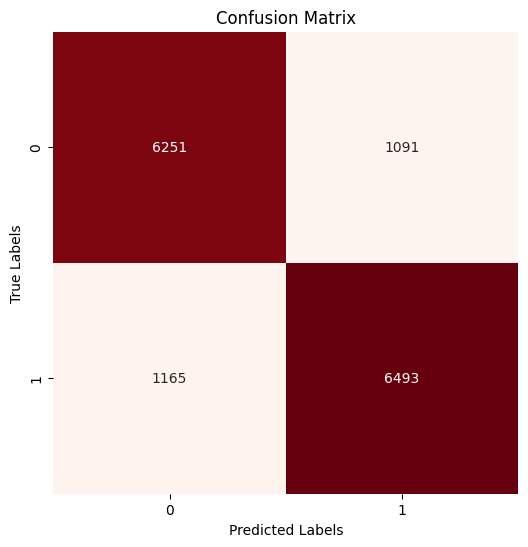

In [34]:
import   matplotlib.pyplot as plt
confusion_matrix  = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

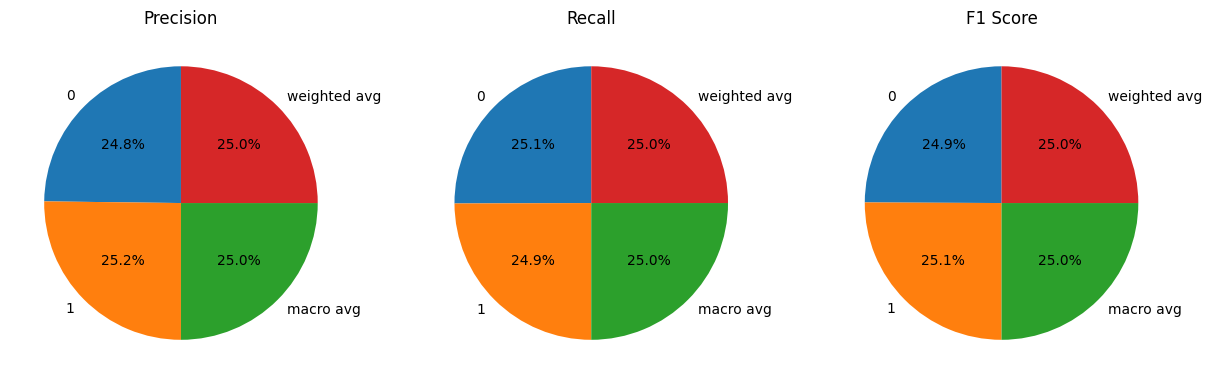

In [35]:

report = classification_report(y_test, y_pred, output_dict=True)

# metrics from the classification report
precision = [report[label]['precision'] for label in report.keys() if label != 'accuracy']
recall = [report[label]['recall'] for label in report.keys() if label != 'accuracy']
f1_score = [report[label]['f1-score'] for label in report.keys() if label != 'accuracy']
labels = [label for label in report.keys() if label != 'accuracy']

# Plotting the metrics as a pie chart
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Precision Pie Chart
axs[0].pie(precision, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Precision')

# Recall Pie Chart
axs[1].pie(recall, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Recall')

# F1 Score Pie Chart
axs[2].pie(f1_score, labels=labels, autopct='%1.1f%%', startangle=90)
axs[2].set_title('F1 Score')

plt.show()


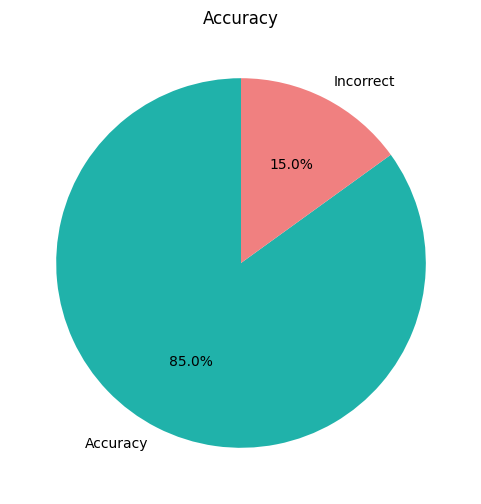

In [39]:
acc = accuracy_score(y_test, y_pred)
plt.figure(figsize=(6, 6))
accuracy_percent = acc * 100
plt.pie([accuracy_percent, 100 - accuracy_percent], labels=['Accuracy', 'Incorrect'], autopct='%1.1f%%', startangle=90, colors=['lightseagreen', 'lightcoral'])
plt.title('Accuracy')
plt.show()

In [44]:
y_pred2 = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2)) 

[[6251 1091]
 [1165 6493]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      7342
           1       0.86      0.85      0.85      7658

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

0.8496


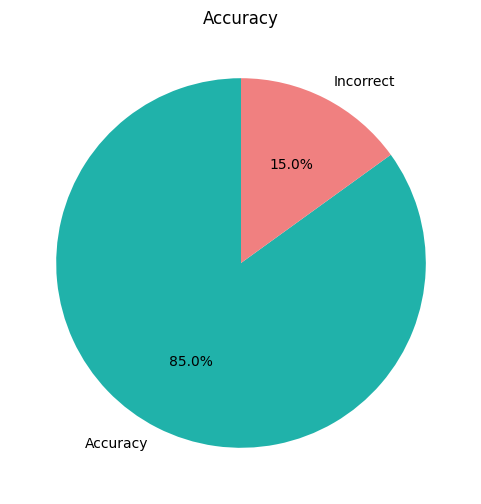

In [45]:
acc = accuracy_score(y_test, y_pred2)
plt.figure(figsize=(6, 6))
accuracy_percent = acc * 100
plt.pie([accuracy_percent, 100 - accuracy_percent], labels=['Accuracy', 'Incorrect'], autopct='%1.1f%%', startangle=90, colors=['lightseagreen', 'lightcoral'])
plt.title('Accuracy')
plt.show()